In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
import numpy as np
from math import sin , cos, pi
from tqdm import tqdm


In [0]:
!pip3 install numba #Für Beschleunigung для ускорения
import numba as nb
from numba import jit

# Funktions, um Vektor E zu rechnen 
## Функции для вычисления вектора Е


In [0]:
def E2(q1,q2, r, x, y):#old vers только для 2 зарядов
    l=1
    k=9*10**9
    v2=(k*q1)/(((x+r/2)**2+(y)**2))
    v3=(k*q2)/(((x-r/2)**2+(y)**2)) 
    x2=((x+r/2))*(v2/(((r/2+x)**2+(y)**2)**0.5))
    y2=y*(v2/(((r/2+x)**2+(y)**2)**0.5))

    x3=(x-r/2)*(v3/(((x-r/2)**2+(y)**2)**0.5))
    y3=y*(v3/(((r/2-x)**2+(y)**2)**0.5))

    x1=(x2+x3)*l
    y1=(y2+y3)*l
    v1=((x1**2+y1**2)**0.5)
  
    
    
    return x1, y1

def E1(q_prop, xs, ys):# для n-ого числа зарядов
    l=1
    k=9*10**9
    dx=0
    dy=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)
      y=(ys-q[1])*(v/r)

      dx+=x
      dy+=y
    
    
    return np.array([dx, dy])

# Primitiv Feldszeichnung
## Отображение векторов напряженности

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


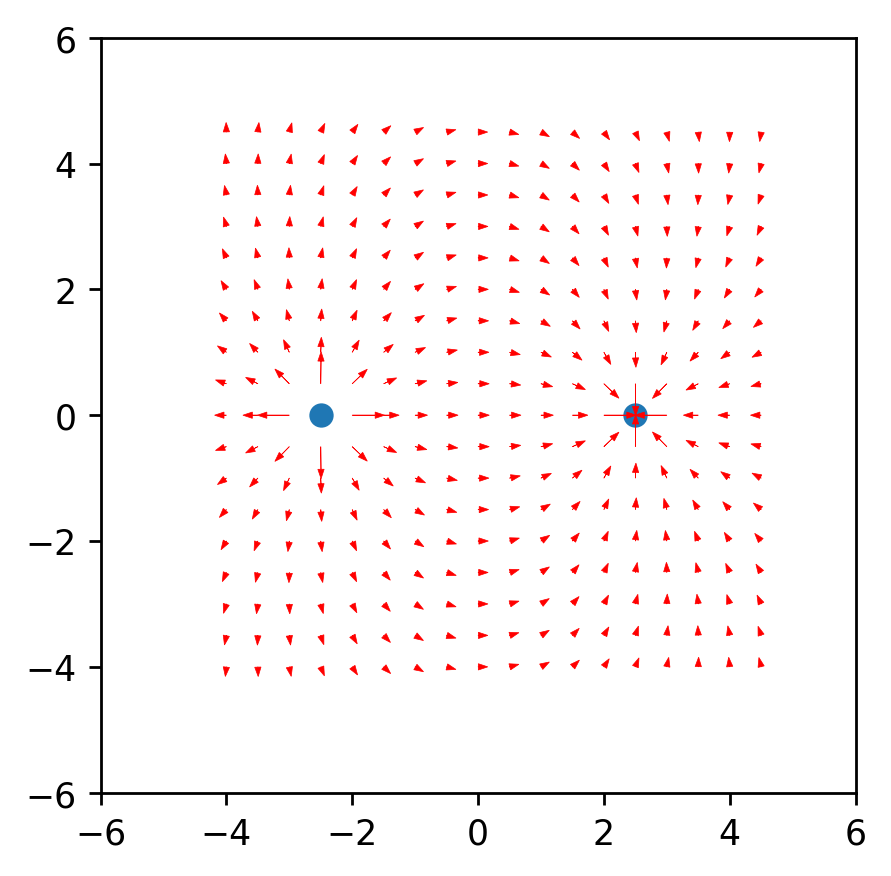

In [0]:
size=4
qual=0.5
gr=np.mgrid[-size:(size+1):qual, -size:(size+1):qual]
xg, yg = np.array(gr[0]).reshape(-1), np.array(gr[1]).reshape(-1)

q1 = 1*10**(-10)
q2 = -1*10**(-10)
r  = 5
size=5
plt.figure(dpi=250)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter([-r/2,r/2],[0,0])
E=0
n=30

for x, y in zip(xg, yg):
    
    x1, y1 = E2(q1,q2,r,x,y)


    plt.scatter([x,x1+x],[y,y1+y],s=0, c='w')

    plt.arrow(x,y,x1*10,y1*10, color='r',head_width=0.1, linewidth=0.2)
plt.show()

# Version nur mit 2 Laden mit Entfernung r
## Только для 2 зарядов удаленных друг от друга на расстояние r




0it [00:00, ?it/s]


2it [00:00,  3.27it/s]


3it [00:01,  2.33it/s]


4it [00:02,  1.74it/s]


5it [00:03,  1.25it/s]


6it [00:05,  1.00s/it]


7it [00:06,  1.03s/it]


8it [00:07,  1.02it/s]


9it [00:07,  1.10it/s]


10it [00:08,  1.18it/s]


11it [00:09,  1.24it/s]


12it [00:09,  1.28it/s]


13it [00:10,  1.30it/s]


14it [00:11,  1.28it/s]


15it [00:12,  1.28it/s]


16it [00:13,  1.28it/s]


17it [00:13,  1.30it/s]


18it [00:14,  1.33it/s]


19it [00:15,  1.36it/s]


20it [00:15,  1.41it/s]


21it [00:16,  1.44it/s]


22it [00:17,  1.43it/s]


23it [00:18,  1.34it/s]


24it [00:19,  1.21it/s]


25it [00:20,  1.01s/it]


26it [00:21,  1.09s/it]


27it [00:22,  1.02s/it]


28it [00:23,  1.09it/s]


29it [00:23,  1.22it/s]


30it [00:23,  1.26it/s]

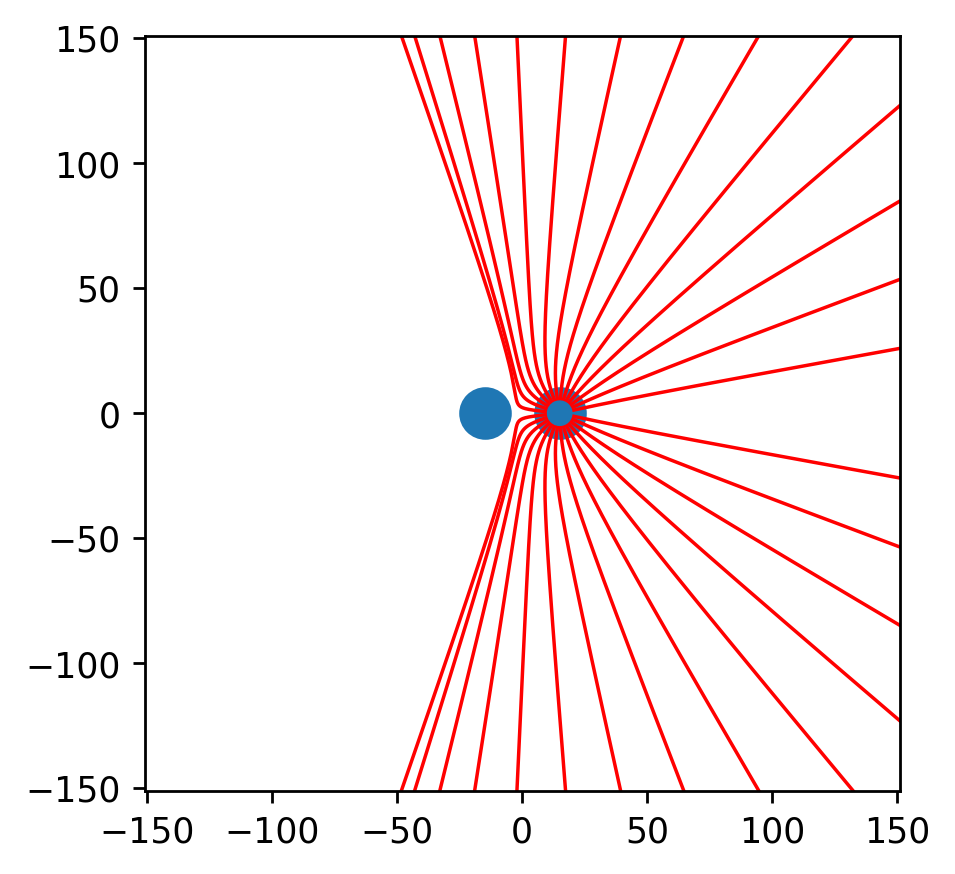

In [0]:
q1 = 10**(-7)
q2 = 2*10**(-7)
r  = 30 #dist of qs
size = 150 #size of plot
plt.figure(dpi=250)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))

plt.gca().set_aspect('equal', adjustable='box')
n=30  # line's num

theta = np.linspace(0, 2*np.pi, n)

r_q = np.sqrt(5)

x11 = r_q*np.cos(theta)+r/2
x22 = r_q*np.sin(theta)

for x0, y0 in tqdm(zip(x11, x22)):

  if abs(y0)>0.01:

    lines=[[],[]]

    E=E2(q1,q2,r,x0,y0)
    x1, y1 = E
    c=0

    while  ((y0-0.1)**2+(x0+r/2)**2)**0.5 > r_q  and abs(x0)<size+2 and abs(y0)<size+2: 

      E=E2(q1,q2,r,x0,y0)
      x1, y1 = E

      x0+=x1
      y0+=y1
      lines[0].append([x0])
      lines[1].append([y0])      
      c+=1
      
    plt.plot(lines[0],lines[1], c="r", linewidth=1)

plt.scatter([-r/2,r/2],[0,0], s=200)

plt.show()


# Ohne Beschleunigung
## Для более чем двух зарядов в произвольных координатах, не оптимизированно





0it [00:00, ?it/s]


1it [00:01,  1.08s/it]


2it [00:03,  1.54s/it]


3it [00:06,  1.92s/it]


4it [00:09,  2.29s/it]


5it [00:12,  2.41s/it]


6it [00:14,  2.30s/it]


7it [00:15,  2.05s/it]


8it [00:16,  1.77s/it]


9it [00:17,  1.52s/it]


10it [00:18,  1.34s/it]


11it [00:19,  1.22s/it]


12it [00:20,  1.20s/it]


13it [00:22,  1.33s/it]


14it [00:25,  1.68s/it]


15it [00:26,  1.67s/it]


16it [00:28,  1.56s/it]


17it [00:29,  1.44s/it]


18it [00:30,  1.32s/it]


19it [00:31,  1.23s/it]


20it [00:32,  1.17s/it]





0it [00:00, ?it/s]


1it [00:01,  1.26s/it]


2it [00:02,  1.21s/it]


3it [00:03,  1.14s/it]


4it [00:04,  1.10s/it]


5it [00:05,  1.06s/it]


6it [00:07,  1.48s/it]


7it [00:10,  1.79s/it]


8it [00:12,  2.02s/it]


9it [00:15,  2.22s/it]


10it [00:16,  1.86s/it]


11it [00:17,  1.60s/it]


12it [00:18,  1.41s/it]


13it [00:19,  1.28s/it]


14it [00:20,  1.20s/it]


15it [00:21,  1.18s/it]


16it [00:23,  1.25s/it]


17it [00:25,  1.47s/it]


18it [00

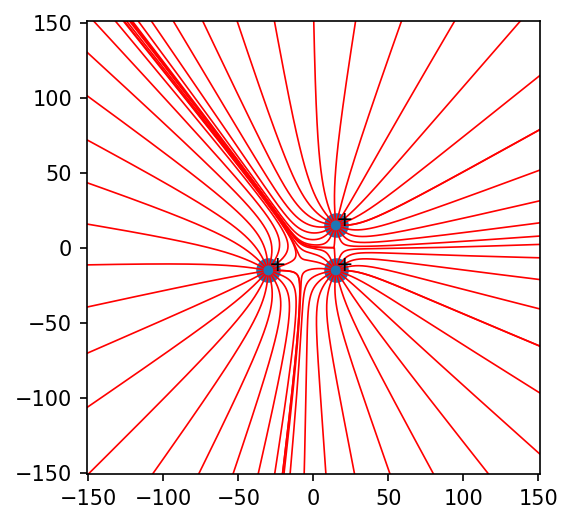

CPU times: user 1min 35s, sys: 377 ms, total: 1min 36s
Wall time: 1min 35s


In [0]:
%%time
size = 150 #size of plot
plt.figure(dpi=150)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
kof=0.001
q_prop=np.array([[-30, -15, 10**(-9),1],[15, -15, 10**(-9),1],[15, 15, 10**(-9),1]])
wind=np.zeros(int(2*np.pi*10))
#q_prop=np.array([[-150000000*kof, 700000*kof, 50*10**(-9),0], [-150000000*kof, -700000*kof, -50*10**(-9),0], [0*kof, 6400*kof, 2*10**(-9),1],[0*kof, -6400*kof, -2*10**(-9),1]])

n=20  #lines num

r_q = np.sqrt(15)
plt.gca().set_aspect('equal', adjustable='box')
theta = np.linspace(0, 2*np.pi, n)
mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
for cq, q in enumerate(mask):
  x11 = r_q*np.cos(theta)+q[0]
  x22 = r_q*np.sin(theta)+q[1]
  for xs, ys in tqdm(zip(x11, x22)):
    lines=[[],[]]
    
    stop=0
    
    lines[0].append(xs)
    lines[1].append(ys)      
    while  abs(xs)<size+2 and abs(ys)<size+2: 
      for cq1, q in enumerate(q_prop):
        if ((ys-q[1])**2+(xs-q[0])**2)**0.5<r_q/2 :#and cq1!=cq
          stop=1
          break
      if stop==1:
        break
      dx, dy = E1(q_prop,xs,ys)

      xs+=dx
      ys+=dy
      lines[0].append(xs)
      lines[1].append(ys)      
      
    plt.plot(lines[0],lines[1], c="r", linewidth=0.8)

plt.scatter(q_prop[:,0],q_prop[:,1], s=r_q*30)
for q in q_prop:
  if q[2]>0:
    plt.text(q[0], q[1], "+", fontsize=10)
  else:
    plt.text(q[0], q[1], "-", fontsize=20)


plt.show()


# Mit Beschleunigung 
## Для более чем двух зарядов в произвольных координатах, оптимизированно


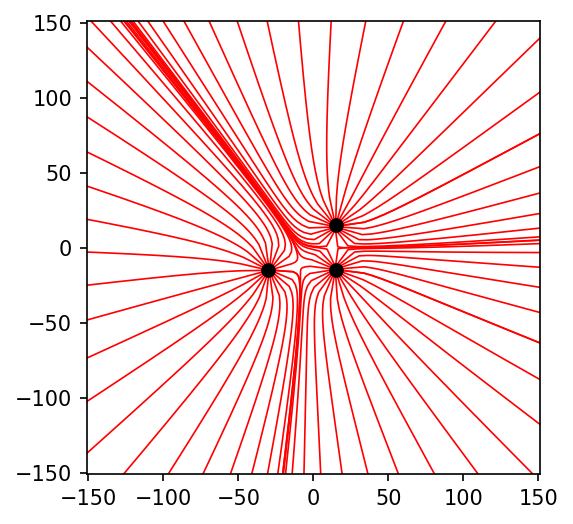

CPU times: user 4.05 s, sys: 816 ms, total: 4.87 s
Wall time: 4.92 s


In [0]:
%%time
q_prop=np.array([[-30, -15, 10**(-9),1],[15, -15, 10**(-9),1],[15, 15, 10**(-9),1]]).astype(np.float32)# [xq,yq,q,1] 0 staat 1, wenn sie nicht die Linien von diesem Laden rechnen  
r_q = np.sqrt(20)
size = 150 #size of plot
n=25

@nb.jit()
def E1(q_prop, xs, ys):
    l=10
    k=9*10**9
    dx=0
    dy=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)*l#*(v/r)
      y=(ys-q[1])*(v/r)*l

      dx+=x
      dy+=y
    
    
    return dx, dy
  
@nb.jit()
def Draw(size, q_prop,r_q, n):
  
  linen=np.empty((np.count_nonzero(q_prop[:,2]>0),n, 2000000), dtype=np.float64)
  linen[:] = np.nan
  theta = np.linspace(0, 2*np.pi, n)
  mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
  for cq in range(len(mask)):
    qmask=mask[cq]
    x11 = r_q*np.cos(theta)+qmask[0]
    x22 = r_q*np.sin(theta)+qmask[1]
    for c in range(len(x11)):

      xs=x11[c]
      ys=x22д[c]

      lines=np.empty((2,1000000), dtype=np.float64)
      lines[:]=np.nan
      stop=0
      nnn=0
      
      lines[0][nnn]=xs
      lines[1][nnn]=ys
      while  abs(xs)<size+2 and abs(ys)<size+2: 
        nnn+=1

        for cq1 in range(len(q_prop)):
          q=q_prop[cq1]
          if ((ys-q[1])**2+(xs-q[0])**2)**0.5<r_q/2 :
            stop=1
            break
        if stop==1:
          break
        dx, dy = E1(q_prop,xs,ys)

        xs+=dx
        ys+=dy
        lines[0][nnn]=xs
        lines[1][nnn]=ys
       
      linen[cq,c,:]=lines.reshape(-1)

  return linen 



def Plot_im(size,q_prop,r_q, n):
  lines=Draw(size,q_prop,r_q, n)

  plt.figure(dpi=150)

  plt.xlim(-(size+1), (size+1))
  plt.ylim(-(size+1), (size+1))
  plt.gca().set_aspect('equal', adjustable='box')
  for qq in lines:
    for l in qq:

      l=l[l!=np.nan].reshape(2,-1)
      plt.plot(l[0][::20],l[1][::20], linewidth=0.8,c="r")


  plt.plot(q_prop[:,0],q_prop[:,1],"bo" , c="black" )

Plot_im(size,q_prop,r_q,n)
plt.savefig("1.png",)
plt.show()


# 3D  ist nicht fertig
## 3D ещё не готово(лень)

In [0]:
%%time
q_prop=np.array([[-30, -15,-15, 10**(-9),1],[15, -15, 15, 10**(-9),1],[15, 15,50, 10**(-9),1]])# [xq,yq,q,1] 0 staat 1, wenn sie nicht die Linien von diesem Laden rechnen  


@nb.jit()
def E1(q_prop, xs, ys, zs):
    l=10
    k=9*10**9
    dx=0
    dy=0
    dz=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2+(zs-q[2])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)*l#*(v/r)
      y=(ys-q[1])*(v/r)*l
      z=(zs-q[2])*(v/r)*l

      dx+=x
      dy+=y
      dz+=z
    
    
    return dx, dy, dz
@nb.jit()#nopython=True)
def Draw(size, q_prop,r_q):
  
  linen=np.empty((np.count_nonzero(q_prop[:,2]>0),n, 2000000), dtype=np.float64)
  linen[:] = np.nan
  


  mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
  for cq in range(len(mask)):
    qmask=mask[cq]
    #x11 = r_q*np.cos(theta)+qmask[0]
    #x22 = r_q*np.sin(theta)+qmask[1]

    pof=np.mgrid[0.0:np.pi:10j, 0.0:2.0*np.pi:10j]
    phi, theta = pof
    xc = r_q*np.sin(phi)*np.cos(theta)+qmask[0]
    yc = r_q*np.sin(phi)*np.sin(theta)+qmask[1]
    zc = r_q*np.cos(phi)+qmask[2]

    for c in range(len(xc)):

      xs=xc[c]
      ys=yc[c]
      zs=zc[c]

      lines=np.empty((3,1000000), dtype=np.float64)
      lines[:]=np.nan
      stop=0
      nnn=0
      
      while  abs(xs)<size+2 and abs(ys)<size+2: 
        for cq1 in range(len(q_prop)):
          q=q_prop[cq1]
          if (((xs-q[0])**2+ys-q[1])**2+(zs-q[2])**2)**0.5<r_q/2 :#and cq1!=cq
            stop=1
            break
        if stop==1:
          break
        dx, dy, dz = E1(q_prop,xs,ys)

        xs+=dx
        ys+=dy
        zs+=dz

        lines[0][nnn]=xs
        lines[1][nnn]=ys
        lines[2][nnn]=zs

        nnn+=1
       
      linen[cq,c,:]=lines.reshape(-1)

  return linen 


size = 150 #size of plot
plt.figure(dpi=50)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
#plt.gca().set_aspect('equal', adjustable='box')
r_q = np.sqrt(20)


fig = plt.figure()
ax = fig.gca(projection='3d')
lines=Draw(size,q_prop,r_q)

#plt.scatter(xxx,yyy,c="r",s=0.3)
for qq in lines:
 for l in qq:

   l=l[l!=np.nan].reshape(2,-1)
   ax.plot(l[0][::20],l[1][::20], c="r", linewidth=0.8)

ax.scatter(q_prop[:,0],q_prop[:,1], s=r_q*30)
for q in q_prop:
  if q[2]>0:
    ax.text(q[0], q[1], "+", fontsize=10)
  else:
    ax.text(q[0], q[1], "-", fontsize=20)

#ax = plt.axes()
#ax.set_facecolor((61/255, 61/255, 61/255))

#ax.set_axis_off()
#plt.savefig("1.png",)


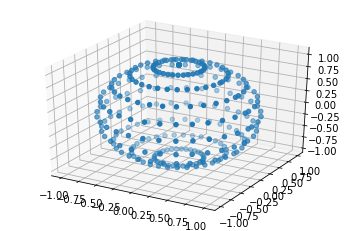

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

r = 1

#phi, theta = np.mgrid[0.0:pi:100, 0.0:2.0*pi:100]
n=20
phi, theta = np.mgrid[0.0:np.pi:(2*np.pi*r)/n, 0.0:2.0*np.pi:0.2]
x = r*np.sin(phi)*np.cos(theta)
y = r*np.sin(phi)*np.sin(theta)
z = r*np.cos(phi)


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x,y,z)
plt.show()

# GIF herstellung
## Создание анимации

0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


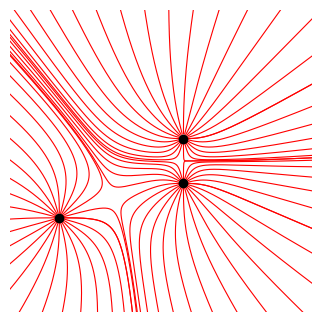

CPU times: user 1min 29s, sys: 2.35 s, total: 1min 31s
Wall time: 1min 31s


In [0]:
%%time
q_prop = np.array([[-70, -40, 10**(-9),1],[15, -15, 10**(-9),1],[15, 15, 10**(-9),1]]).astype(np.float32)# [xq,yq,q,1] 0 staat 1, wenn sie nicht die Linien von diesem Laden rechnen  
r_q = np.sqrt(10)
size = 100 # size of plot
n = 25 #n lines
N = 16 # n frames

@nb.jit()
def E1(q_prop, xs, ys):
    l=0.1
    k=9*10**9
    dx=0
    dy=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)*l
      y=(ys-q[1])*(v/r)*l

      dx+=x
      dy+=y
    
    
    return dx, dy
@nb.jit()
def Draw(size, q_prop,r_q, n):
  
  linen=np.empty((np.count_nonzero(q_prop[:,2]>0),n, 2000000), dtype=np.float64)
  linen[:] = np.nan
  theta = np.linspace(0, 2*np.pi, n)
  mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
  for cq in range(len(mask)):
    qmask=mask[cq]
    x11 = r_q*np.cos(theta)+qmask[0]
    x22 = r_q*np.sin(theta)+qmask[1]
    for c in range(len(x11)):

      xs=x11[c]
      ys=x22[c]

      lines=np.empty((2,1000000), dtype=np.float64)
      lines[:]=np.nan
      stop=0
      nnn=0
      lines[0][nnn]=xs
      lines[1][nnn]=ys
      while  abs(xs)<size+2 and abs(ys)<size+2:
        nnn+=1
        for cq1 in range(len(q_prop)):
          q=q_prop[cq1]
          if ((ys-q[1])**2+(xs-q[0])**2)**0.5<r_q/2 :
            stop=1
            break
        if stop==1:
          break
        dx, dy = E1(q_prop,xs,ys)

        xs+=dx
        ys+=dy
        lines[0][nnn]=xs
        lines[1][nnn]=ys
       
      linen[cq,c,:]=lines.reshape(-1)

  return linen 


fig = plt.figure(dpi=100)
ax = plt.axes()
ax.set_axis_off()
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')
a_lines=[]
points=[]

lines=Draw(size,q_prop,r_q, n)
for index in range(lines.shape[0]*lines.shape[1]):
    a_lines.append(plt.plot([],[],ls="-", lw=0.8, c="r")[0])
points.append(plt.plot([],[],"bo" , c="black" )[0])


def Plot_im(size,q_prop,r_q, n):

  lines=Draw(size,q_prop,r_q, n)
  c=0
  for qq in lines:
    for l in qq:
      l=l[l!=np.nan].reshape(2,-1)
      a_lines[c].set_data(l[0], l[1])
      c+=1

  points[0].set_data(q_prop[:,0],q_prop[:,1])
  return a_lines+points
  
def animate(x):
    print(x)
    q_prop[0][0]+=x/60
    q_prop[0][1]+=x/60

    return Plot_im(size,q_prop,r_q, n)
      
def init():
      lobj = plt.plot([],[], lw=0.8, c="r")[0]
      return lobj,

anim = animation.FuncAnimation(fig, animate, frames=N, interval=20, blit=True)
anim.save('Ohne Wirkung.gif', writer='imagemagick', fps=30)
plt.show()

# GIF herstellung mit Bewegungen
## Анимация + симуляция взаимодействия(необходима ручная подстройка зарядов и размера окна для хорошего результата) 

1


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

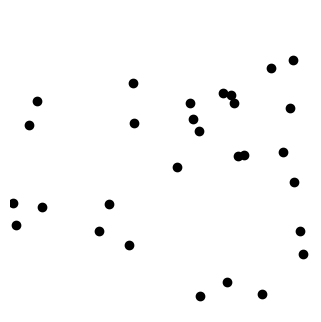

0.2
CPU times: user 10.2 s, sys: 700 ms, total: 10.9 s
Wall time: 10.7 s


In [0]:
%%time
m=9.1*10**(-11)
q=1.6*10**(-10)
Cell=[-1, -10, -q,m, 0, 0]
#q_prop = np.array([[-1, -10, -q,m, 0, 0],[30, 0, q, m, 0, 0],[-30, 0, q, m, 0, 0]]).astype(np.float32)# [[xq1, yq1, q1, mq1, vxq1, vyq1], [xq2, yq2, q2, mq2, vxq2, vyq2] ... ] 
nn=200
q_prop=np.empty((nn,6))
for i in range(nn):
  q_prop[i]=[size-np.random.rand()*2*size, size-np.random.rand()*2*size, q*(1-np.random.rand()*2), m*np.random.rand(), 0,0]
r_q = np.sqrt(5)
size = 150 # size of plot
n = 0 # n lines
N = 500 # n frames
dt=1
@nb.jit()
def E(q_prop, xs, ys, nq):
  l=1
  k=9*10**9
  Ex=0
  Ey=0
  c=0
  if nq==None:
    for c in range(len(q_prop)):
        q=q_prop[c]
        r=((xs-q[0])**2+(ys-q[1])**2)**0.5
        dEv=(k*q[2])/r**2
        dEx=(xs-q[0])*(dEv/r)*l
        dEy=(ys-q[1])*(dEv/r)*l

        Ex+=dEx
        Ey+=dEy
    return Ex, Ey
  else:
    for c in range(len(q_prop)):
        if c!=nq:
            q=q_prop[c]
            
            r=((xs-q[0])**2+(ys-q[1])**2)**0.5
            dEv=(k*q[2])/r**2
            dEx=(xs-q[0])*(dEv/r)*l
            dEy=(ys-q[1])*(dEv/r)*l

            Ex+=dEx
            Ey+=dEy
    return Ex, Ey

#k=0.0000000004
#dt=(((size*q_prop[0][3])/(q_prop[0][2]*E(q_prop,q_prop[0][0],q_prop[0][1],0 )[0]))**2)/N*k
print(dt)


@nb.jit()
def Update_all(q_prop):
  vx=0
  vy=0
  x=0
  y=0
  q_prop_1=np.copy(q_prop)
  for c in range(len(q_prop)):
    xs=q_prop[c][0]
    ys=q_prop[c][1]
    q =q_prop[c][2]
    m =q_prop[c][3]
    vx=q_prop[c][4]
    vy=q_prop[c][5]
    Ex, Ey= E(q_prop, xs, ys, c)

    x=(((Ex*q)/m)*dt**2)/2+vx*dt+xs
    y=(((Ey*q)/m)*dt**2)/2+vy*dt+ys
    vx+=((Ex*q)/m)*dt
    vy+=((Ey*q)/m)*dt
    #print(q_prop[c]-[x,y,q,m,vx,vy])
    q_prop_1[c]=[x,y,q,m,vx,vy]
  
  return q_prop_1

@nb.jit()
def Make_data(size, q_prop, r_q, n):
  #global q_prop
  q_prop=Update_all(q_prop)
  linen=np.empty((np.count_nonzero(q_prop[:,2]>0),n, 6000000), dtype=np.float64)

  linen[:] = np.nan
  theta = np.linspace(0, 2*np.pi, n)
  mask=q_prop[ q_prop[:,2]>0 ]
  for cq in range(len(mask)):

      qmask=mask[cq]
      xr = r_q*np.cos(theta)+qmask[0]
      yr = r_q*np.sin(theta)+qmask[1]
        
      for c in range(len(xr)):

        xs=xr[c]
        ys=xr[c]

        lines=np.empty((2,3000000), dtype=np.float64)
        lines[:]=np.nan
        stop=0
        nnn=0
        lines[0][nnn]=xs
        lines[1][nnn]=ys
        while  abs(xs)<size+2 and abs(ys)<size+2:
          nnn+=1
          for cq1 in range(len(q_prop)):
            q=q_prop[cq1]
            if ((ys-q[1])**2+(xs-q[0])**2)**0.5<r_q :
              stop=1
              break
          if stop==1:
            break
          dx, dy = E(q_prop,xs,ys,None)

          xs+=dx
          ys+=dy
          lines[0][nnn]=xs
          lines[1][nnn]=ys
        
        linen[cq,c,:]=lines.reshape(-1)

  return linen,q_prop


fig = plt.figure(dpi=100)
ax = plt.axes()
ax.set_axis_off()
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')
a_lines=[]
points=[]

lines, q_prop=Make_data(size,q_prop, r_q, n)
for index in range(lines.shape[0]*lines.shape[1]):
    a_lines.append(plt.plot([],[],ls="-", lw=0.8, c="r")[0])
points.append(plt.plot([],[],"bo",lw=500 , c="black" )[0])


def Plot_im(size,r_q, n):
  global q_prop
  lines,q_prop=Make_data(size,q_prop,r_q, n)
  c=0
  for qq in lines:
    for l in qq:
      l=l[l!=np.nan].reshape(2,-1)
      a_lines[c].set_data(l[0][::20], l[1][::20])
      c+=1

  points[0].set_data(q_prop[:,0],q_prop[:,1])
  return a_lines+points
  
def animate(x):
    global q_prop
    print(x)

    return Plot_im(size,r_q, n)
      
def init():
      lobj = plt.plot([],[], lw=0.8, c="r")[0]
      return lobj,

anim = animation.FuncAnimation(fig, animate, frames=N, interval=200, blit=True)
anim.save('Mit der Wirkung.gif', writer='imagemagick', fps=30)
plt.show()
print(0.2/dt)

In [0]:
q_prop=np.empty((1,20,6))
for i in range(20):
  q_prop[0][i]=[100-np.random.rand()*200, 100-np.random.rand()*200, -q*np.random.rand(), m*np.random.rand(), 0,0]

# Solar system modell
## Модель солнечной системы на основе полученного опыта

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


KeyboardInterrupt: ignored

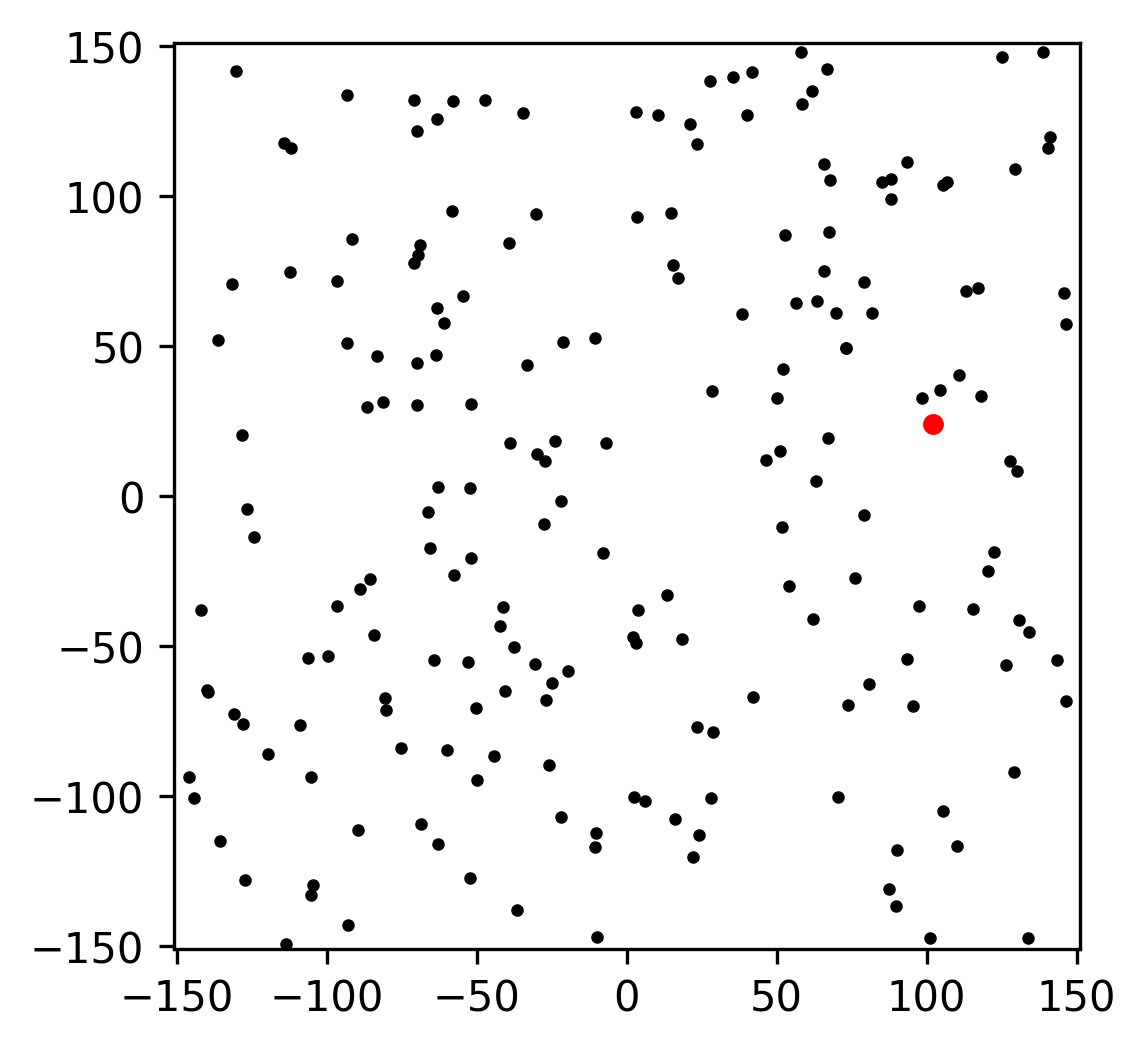

In [0]:
%%time
ae=149.6*10**9


def V(a,e):
  m=1.99*10**30 
  G=6.67*10**-11
  print(((G*m)/a*((1+e)/(1-e)))**0.5)
  return a*(1-e), ((G*m)/a*((1+e)/(1-e)))**0.5
Sonne=  [0       , 0, 1.99*10**30     , 0, 0, 0]
Merkur= [0.387*ae, 0, 3.33*10**23  , 0, 1, 0.206]
Venus=  [0.723*ae, 0, 4.87*10**24  , 0, 1, 0.007]
Erde=   [1*ae    , 0, 5.97*10**24  , 0, 1, 0.017]
Mars=   [1.524*ae, 0, 6.42*10**23  , 0, 1, 0.093]
Jupiter=[5.204*ae, 0, 1.90*10**27  , 0, 1, 0.048]
Saturn= [9.582*ae, 0, 5.68*10**26  , 0, 1, 0.056]
Uran=   [19.23*ae, 0, 8.68*10**25  , 0, 1, 0.044]
Neptun= [30.06*ae, 0, 1.02*10**26  , 0, 1, 0.011]

q_prop = np.array([Sonne,Merkur, Venus, Erde, Mars])#, Jupiter])#, Saturn, Uran, Neptun])# [[xq1, yq1, mq1, vxq1, vyq1], [xq2, yq2, mq2, vxq2, vyq2] ... ] 

for c, planet in enumerate(q_prop[1:]):
  q, v=V(planet[0], planet[5])
  q_prop[c+1][4]*=v
  q_prop[c+1][0]=q
  
size = max(q_prop[:,0])*1.5 # size of plot
#print(q_prop)

N = 1000 # n frames
dt=3600*24
@nb.jit()
def g(q_prop, xs, ys, nq):
    G=6.67*10**-11
    gx=0
    gy=0
    c=0
    for c in range(len(q_prop)):
        if c!=nq:
            Objekt=q_prop[c]
            
            r=((xs-Objekt[0])**2+(ys-Objekt[1])**2)**0.5
            dgv=-(G*Objekt[2])/(r**2)
            dgx=(xs-Objekt[0])*(dgv/r)
            dgy=(ys-Objekt[1])*(dgv/r)

            gx+=dgx
            gy+=dgy
    return gx, gy


@nb.jit()
def Update_all(q_prop):
  vx=0
  vy=0
  x=0
  y=0
  q_prop_1=np.copy(q_prop)
  for c in range(len(q_prop)):
    xs=q_prop[c][0]
    ys=q_prop[c][1]
    m =q_prop[c][2]
    vx=q_prop[c][3]
    vy=q_prop[c][4]
    gx, gy= g(q_prop, xs, ys, c)

    x = gx*dt**2 + vx*dt + xs
    y = gy*dt**2 + vy*dt + ys
    vx+=gx*dt
    vy+=gy*dt

    q_prop_1[c]=[x,y,m,vx,vy, 0]
  
  return q_prop_1



fig = plt.figure(dpi=300)
#ax = plt.axes()
#ax.set_axis_off()
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')

points=[]
#lines_p=[]

q_prop=Update_all(q_prop)

points.append(plt.plot([],[],"bo", c="r",markersize=4 )[0])
points.append(plt.plot([],[],"bo",markersize=2, c="black" )[0])
#lines_p.append(plt.plot([],[], c="r" )[0])

#lines=[[],[]]
def Plot_im(size):
  global q_prop
  global lines
  q_prop=Update_all(q_prop)
  points[0].set_data(q_prop[0,0],q_prop[0,1])

  points[1].set_data(q_prop[1:,0],q_prop[1:,1])
  #lines[0]=[q_prop[:,0]]
  #lines[1]=[q_prop[:,1]]
  #lines_p[0].set_data(lines[0],lines[1])
  return points#+lines_p
  
def animate(x):
    global q_prop
    print(x)

    return Plot_im(size)
      
def init():
      lobj = plt.plot([],[], lw=0.8, c="r")[0]
      return lobj,

anim = animation.FuncAnimation(fig, animate, frames=N, interval=200, blit=True)
anim.save('Sonnensystem.gif', writer='imagemagick', fps=30)
plt.show()
print(0.2/dt)

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
import numpy as np
from math import sin , cos, pi
from tqdm import tqdm
!pip3 install numba #Für Beschleunigung
import numba as nb
from numba import jit, njit, vectorize, cuda
import tqdm as tqdm

59010.81035902995
35277.241711383766
30297.54058777193
26487.295235303594


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

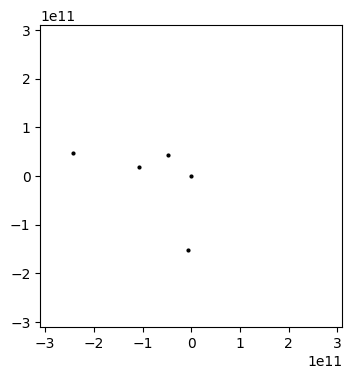

2.3148148148148148e-06
CPU times: user 43 s, sys: 33 s, total: 1min 16s
Wall time: 1min 15s


In [0]:
%%time
ae=149.6*10**9


def V(a,e):
  m=1.99*10**30 
  G=6.67*10**-11
  print(((G*m)/a*((1+e)/(1-e)))**0.5)
  return a*(1-e), ((G*m)/a*((1+e)/(1-e)))**0.5
Sonne=  [0       , 0, 1.99*10**30     , 0, 0, 0]
Merkur= [0.387*ae, 0, 3.33*10**23  , 0, 1, 0.206]
Venus=  [0.723*ae, 0, 4.87*10**24  , 0, 1, 0.007]
Erde=   [1*ae    , 0, 5.97*10**24  , 0, 1, 0.017]
Mars=   [1.524*ae, 0, 6.42*10**23  , 0, 1, 0.093]
Jupiter=[5.204*ae, 0, 1.90*10**27  , 0, 1, 0.048]
Saturn= [9.582*ae, 0, 5.68*10**26  , 0, 1, 0.056]
Uran=   [19.23*ae, 0, 8.68*10**25  , 0, 1, 0.044]
Neptun= [30.06*ae, 0, 1.02*10**26  , 0, 1, 0.011]

q_prop = np.array([Sonne,Merkur, Venus, Erde, Mars])#, Jupiter])#, Saturn, Uran, Neptun])# [[xq1, yq1, mq1, vxq1, vyq1], [xq2, yq2, mq2, vxq2, vyq2] ... ] 


for c, planet in enumerate(q_prop[1:]):
  q, v=V(planet[0], planet[5])
  q_prop[c+1][4]*=v
  q_prop[c+1][0]=q
  
size = max(q_prop[:,0])*1.5 # size of plot
#print(q_prop)

N = 1000 # n frames
dt=3600*24
# N = 1000 # n frames
# var=0.5
# dt=1
# size=500
# size1=200
# nn=200
# m=2000000
# q_prop=np.empty((nn,5))
# for i in range(nn):
#   q_prop[i]=[size1-np.random.rand()*2*size1, size1-np.random.rand()*2*size1,  m, 0,0]#1-np.random.rand()*2


@nb.jit()
def g(q_prop, xs, ys, nq):
    G=6.67*10**-11
    gx=0
    gy=0
    c=0
    for c in range(len(q_prop)):
        if c!=nq:
            Objekt=q_prop[c]
            
            r=((xs-Objekt[0])**2+(ys-Objekt[1])**2)**0.5
            dgv=-(G*Objekt[2])/(r**2)
            dgx=(xs-Objekt[0])*(dgv/r)
            dgy=(ys-Objekt[1])*(dgv/r)

            gx+=dgx
            gy+=dgy
    return gx, gy


@nb.jit()
def Update_all(q_prop):
  vx=0
  vy=0
  x=0
  y=0
  q_prop_1=np.copy(q_prop)
  for c in range(len(q_prop)):
    xs=q_prop[c][0]
    ys=q_prop[c][1]
    m =q_prop[c][2]
    vx=q_prop[c][3]
    vy=q_prop[c][4]
    gx, gy= g(q_prop, xs, ys, c)

    x = gx*dt**2 + vx*dt + xs
    y = gy*dt**2 + vy*dt + ys
    vx+=gx*dt
    vy+=gy*dt

    q_prop_1[c]=[x,y,m,vx,vy,0]
  
  return q_prop_1



fig = plt.figure(dpi=100)
#ax = plt.axes()
#ax.set_axis_off()
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')

points=[]
#lines_p=[]

q_prop=Update_all(q_prop)

points.append(plt.plot([],[],"bo",markersize=2, c="black" )[0])
#lines_p.append(plt.plot([],[], c="r" )[0])

#lines=[[],[]]
def Plot_im(size):
  global q_prop
  global lines
  q_prop=Update_all(q_prop)
  points[0].set_data(q_prop[:,0],q_prop[:,1])
  #lines[0]=[q_prop[:,0]]
  #lines[1]=[q_prop[:,1]]
  #lines_p[0].set_data(lines[0],lines[1])
  return points#+lines_p
  
def animate(x):
    global q_prop
    print(x)

    return Plot_im(size)
      
def init():
      lobj = plt.plot([],[], lw=0.8, c="r")[0]
      return lobj,

anim = animation.FuncAnimation(fig, animate, frames=N, interval=1, blit=True)
anim.save('Sonnensystem.gif', writer='imagemagick', fps=30)
plt.show()
print(0.2/dt)

In [0]:
%%time
# ae=149.6*10**9


# def V(a,e):
#   m=1.99*10**30 
#   G=6.67*10**-11
#   print(((G*m)/a*((1+e)/(1-e)))**0.5)
#   return a*(1-e), ((G*m)/a*((1+e)/(1-e)))**0.5
# Sonne=  [0       , 0, 1.99*10**30     , 0, 0, 0]
# Merkur= [0.387*ae, 0, 3.33*10**23  , 0, 1, 0.206]
# Venus=  [0.723*ae, 0, 4.87*10**24  , 0, 1, 0.007]
# Erde=   [1*ae    , 0, 5.97*10**24  , 0, 1, 0.017]
# Mars=   [1.524*ae, 0, 6.42*10**23  , 0, 1, 0.093]
# Jupiter=[5.204*ae, 0, 1.90*10**27  , 0, 1, 0.048]
# Saturn= [9.582*ae, 0, 5.68*10**26  , 0, 1, 0.056]
# Uran=   [19.23*ae, 0, 8.68*10**25  , 0, 1, 0.044]
# Neptun= [30.06*ae, 0, 1.02*10**26  , 0, 1, 0.011]

# q_prop = np.array([Sonne,Merkur, Venus, Erde, Mars])#, Jupiter])#, Saturn, Uran, Neptun])# [[xq1, yq1, mq1, vxq1, vyq1], [xq2, yq2, mq2, vxq2, vyq2] ... ] 


# for c, planet in enumerate(q_prop[1:]):
#   q, v=V(planet[0], planet[5])
#   q_prop[c+1][4]*=v
#   q_prop[c+1][0]=q
  
# size = max(q_prop[:,0])*1.5 # size of plot
# #print(q_prop)

# N = 1000 # n frames
# dt=3600*24
N = 1000 # n frames
var=0.4
dt=1000
size=500
size1=300
nn=30
m=2000000
q_prop=np.empty((nn,5))
for i in range(nn):
  q_prop[i]=[size1-np.random.rand()*2*size1, size1-np.random.rand()*2*size1,  m, 0,0]#1-np.random.rand()*2


@nb.jit()
def g(q_prop, xs, ys, nq):
    G=6.67*10**-11
    gx=0
    gy=0
    c=0
    for c in range(len(q_prop)):
        if c!=nq:
            Objekt=q_prop[c]
            
            r=((xs-Objekt[0])**2+(ys-Objekt[1])**2)**0.5
            print("#")
            print(r)
            print("#")
            if r!=0:
              dgv=-(G*Objekt[2])/(r**2)
              dgx=(xs-Objekt[0])*(dgv/r)
              dgy=(ys-Objekt[1])*(dgv/r)
            else:
              dgv=0
              dgx=0
              dgy=0
            gx+=dgx
            gy+=dgy
    return gx, gy


#@nb.jit()
def Update_all(q_prop):
  vx=0
  vy=0
  x=0
  y=0
  q_prop_1=np.copy(q_prop)
  q_prop_2=[]
  no=[]
  for c in range(len(q_prop)):
    xs=q_prop[c][0]
    ys=q_prop[c][1]
    m =q_prop[c][2]
    vx=q_prop[c][3]
    vy=q_prop[c][4]

    #print((xs, ys, c))
    gx, gy= g(q_prop, xs, ys, c)

    x = gx*dt**2 + vx*dt + xs
    y = gy*dt**2 + vy*dt + ys
    vx+=gx*dt
    vy+=gy*dt

    q_prop_1[c]=[x,y,m,vx,vy]

  if var>0.5:
    for c in range(len(q_prop_1)):#kollision
      for c1 in range(len(q_prop_1)):
        if c!=c1 and c not in no and c1 not in no:
          r=((q_prop_1[c][0]-q_prop_1[c1][0])**2+(q_prop_1[c][1]-q_prop_1[c1][1])**2)**0.5
          #print(r)
          if r<10:
            print("********************")
            x=(q_prop_1[c1][0]+q_prop_1[c][0])/2
            y=(q_prop_1[c1][1]+q_prop_1[c][1])/2
            m =q_prop_1[c1][2]+q_prop_1[c][2]
            vx=q_prop_1[c1][3]+q_prop_1[c][3]
            vy=q_prop_1[c1][4]+q_prop_1[c][4]
            #print([x,y,m,vx,vy])
            q_prop_2.append([x,y,m,vx,vy])
            no.append(c)
            no.append(c1)
            break
          else:
            q_prop_2.append(list(q_prop_1[c]))
    return np.array(q_prop_2).reshape(-1,5)

  else:
    for c in range(len(q_prop_1)):#kollision
      for c1 in range(len(q_prop_1)):
        if c!=c1:
          r=((q_prop_1[c][0]-q_prop_1[c1][0])**2+(q_prop_1[c][1]-q_prop_1[c1][1])**2)**0.5
          #print(r)
          if r<10:
            q_prop_1[c][3]*=-1
            q_prop_1[c][4]*=-1
            break

    return q_prop_1



  
  #print( np.array(q_prop_2).reshape(-1,5))



fig = plt.figure(dpi=200)
#ax = plt.axes()
#ax.set_axis_off()
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')

points=[]
#lines_p=[]

q_prop=Update_all(q_prop)

points.append(plt.plot([],[],"bo",markersize=2, c="black" )[0])
#lines_p.append(plt.plot([],[], c="r" )[0])

#lines=[[],[]]
def Plot_im(size):
  global q_prop
  global lines
  q_prop=Update_all(q_prop)
  #print(q_prop)
  points[0].set_data(q_prop[:,0],q_prop[:,1])
  #lines[0]=[q_prop[:,0]]
  #lines[1]=[q_prop[:,1]]
  #lines_p[0].set_data(lines[0],lines[1])
  return points#+lines_p
  
def animate(x):
    global q_prop
    print(x)

    return Plot_im(size)
      
def init():
      lobj = plt.plot([],[], lw=0.8, c="r")[0]
      return lobj,

anim = animation.FuncAnimation(fig, animate, frames=N, interval=1, blit=True)
anim.save('Sonnensystem.gif', writer='imagemagick', fps=30)
plt.show()
print(0.2/dt)